Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
      age     bmi smoker      charges
0      19  27.900    yes  16884.92400
1      18  33.770     no   1725.55230
2      28  33.000     no   4449.46200
3      33  22.705     no  21984.47061
4      32  28.880     no   3866.85520
...   ...     ...    ...          ...
1333   50  30.970     no  10600.54830
1334   18  31.920     no   2205.98080
1335   18  36.850     no   1629.83350
1336   21  25.800     no   2007.94500
1337   61  29.070    yes  29141.36030

[1338 rows x 4 columns]
Matrix: 
            Unnamed: 0       age       bmi   charges
Unnamed: 0    1.000000 -0.031467 -0.036169 -0.003373
age          -0.031467  1.000000  0.109272  0.299008
bmi          -0.036169  0.109272  1.000000  0.198341
charges      -0.003373  0.299008  0.198341  1.000000


TypeError: 'tuple' object is not callable

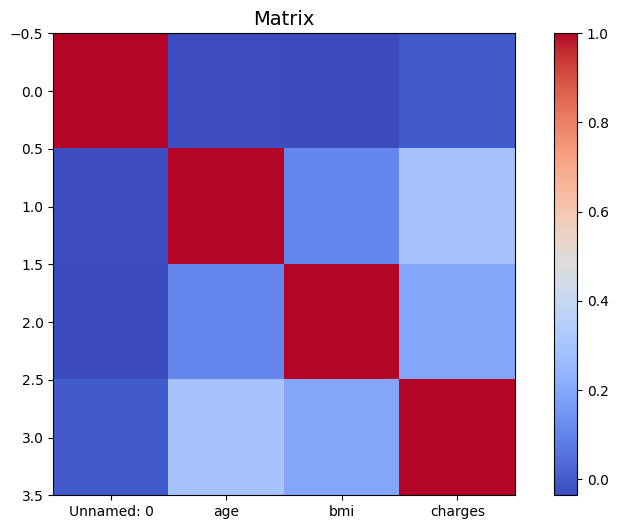

In [17]:
%pip install pandas
%pip install matplotlib
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("./insurance.csv")
relevant_columns = ["age","bmi","smoker","charges"]
cleaned = df[relevant_columns]
print (cleaned)
cleaned.to_csv("./cleaned_data.csv")

data = pd.read_csv("./cleaned_data.csv")
numeric_data = data.select_dtypes(["number"])

correlation = numeric_data.corr()
print("Matrix: ")
print(correlation)

plt.figure(figsize=(10,6))
plt.title("Matrix", fontsize = 14)
plt.imshow(correlation, cmap = "coolwarm", interpolation="none")
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns)
plt.yticks(range(len(list(correlation.columns))), list(correlation.columns))
plt.show()
print(type(correlation))

def rechnen (row):
    kosten = 0
    kosten += row["bmi"]
    kosten += row["age"]
    if row ["smoker"]=="yes":
        kosten += row["charges"]*3
    else:
        kosten += row ["charges"]
    return kosten
data["kosten"] = data.apply(rechnen, axis=1)
print(data[["age","kosten"]].sort_values(by="kosten", ascending = False))